In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import SCORERS
from sklearn.metrics import f1_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from econml.metalearners import TLearner, SLearner, XLearner, DomainAdaptationLearner

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.csv')
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-1.853672,-2.201766,1.500917,0.161703,-0.129052,-1.023402,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.244050,5.269701,4.598246
743,-1.066845,-1.402238,1.128554,2.244320,0.371086,2.288910,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.253175,8.393338,0.940855
744,-1.045229,-1.337276,1.128554,-0.879606,0.683672,0.301522,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.908235,6.897207,4.373736
745,-0.115735,-0.602710,-1.105624,2.244320,0.558638,2.785756,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.324520,9.208251,0.352653


# Exploratory Data Analysis
In EDA We will Analyze :
1. Missing Values
2. Analysing Numerical and categorical features
3. Analysing outliers
4. Pearson Correlation
5.
6.

## 1.  Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      747 non-null    float64
 1   x2      747 non-null    float64
 2   x3      747 non-null    float64
 3   x4      747 non-null    float64
 4   x5      747 non-null    float64
 5   x6      747 non-null    float64
 6   x7      747 non-null    float64
 7   x8      747 non-null    float64
 8   x9      747 non-null    float64
 9   x10     747 non-null    float64
 10  x11     747 non-null    float64
 11  x12     747 non-null    float64
 12  x13     747 non-null    float64
 13  x14     747 non-null    float64
 14  x15     747 non-null    float64
 15  x16     747 non-null    float64
 16  x17     747 non-null    float64
 17  x18     747 non-null    float64
 18  x19     747 non-null    float64
 19  x20     747 non-null    float64
 20  x21     747 non-null    float64
 21  x22     747 non-null    float64
 22  x2

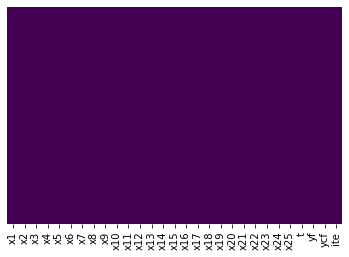

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.info()

The  heatmap shows that there  are no null values in the dataset

#  2. Analyzing Numerical and Categorical Features

In [4]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  29


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591


There are no categorical features , all are numerical features

# 2A. ----> Discrete features in numerical features

In [5]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<20]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 22


array([[<AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>],
       [<AxesSubplot:title={'center':'x10'}>,
        <AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>,
        <AxesSubplot:title={'center':'x14'}>],
       [<AxesSubplot:title={'center':'x15'}>,
        <AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>],
       [<AxesSubplot:title={'center':'x20'}>,
        <AxesSubplot:title={'center':'x21'}>,
        <AxesSubplot:title={'center':'x22'}>,
        <AxesSubplot:title={'center':'x23'}>,
        <AxesSubplot:title={'center':'x24'}>],
       [<AxesSubplot:title={'center':'x25'}>,
        <AxesSubplot:title={'center

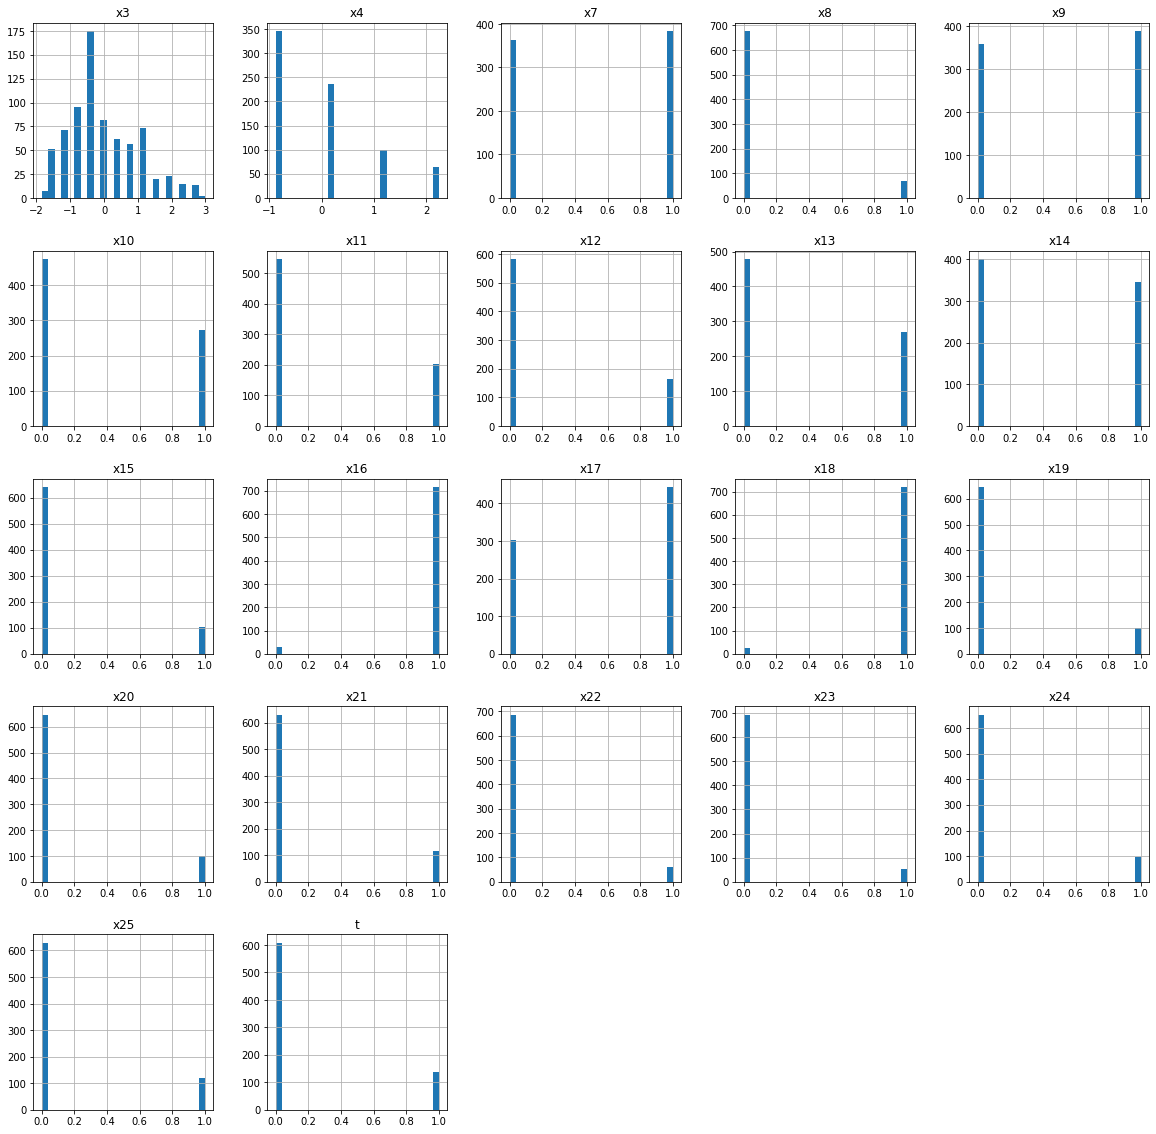

In [6]:
df[discrete_feature].hist(bins=25,figsize=(20,20))

# 2B. ----> Contineous features in numerical features

In [7]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


In [8]:
continuous_feature

['x1', 'x2', 'x5', 'x6', 'yf', 'ycf', 'ite']

x1  skew score ---->  -0.51286916154474
x2  skew score ---->  -0.7006995884365952
x5  skew score ---->  -0.913498149641234
x6  skew score ---->  0.39949816076312994
yf  skew score ---->  0.7280326738928113
ycf  skew score ---->  -1.0293356760697916
ite  skew score ---->  -2.7736406230117785


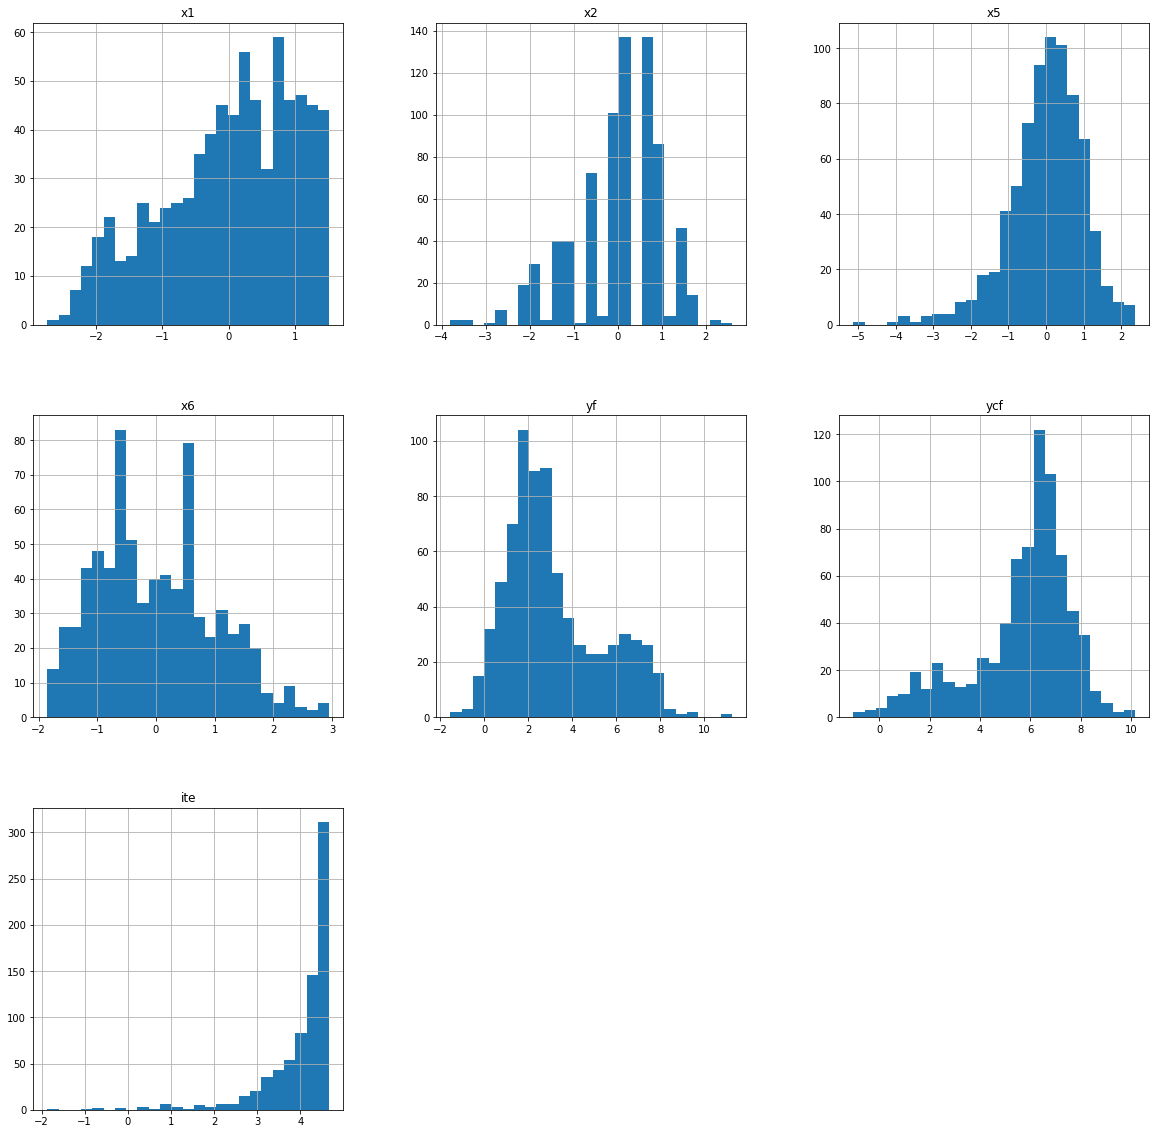

In [9]:
from functions import hist_skew_score
hist_skew_score(continuous_feature,df)

We are having right and left skewed features. Hence our dataset is skewed

# 3. Analysing outliers

<AxesSubplot:>

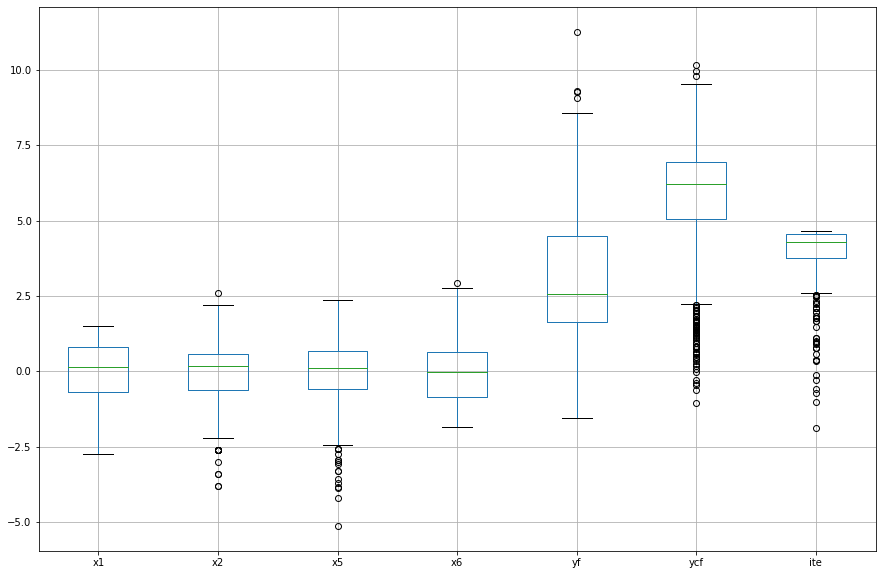

In [10]:
df.boxplot(column=continuous_feature,figsize=(15,10))

Except 'x1' all features have outliers

# 4. Pearson Correlation

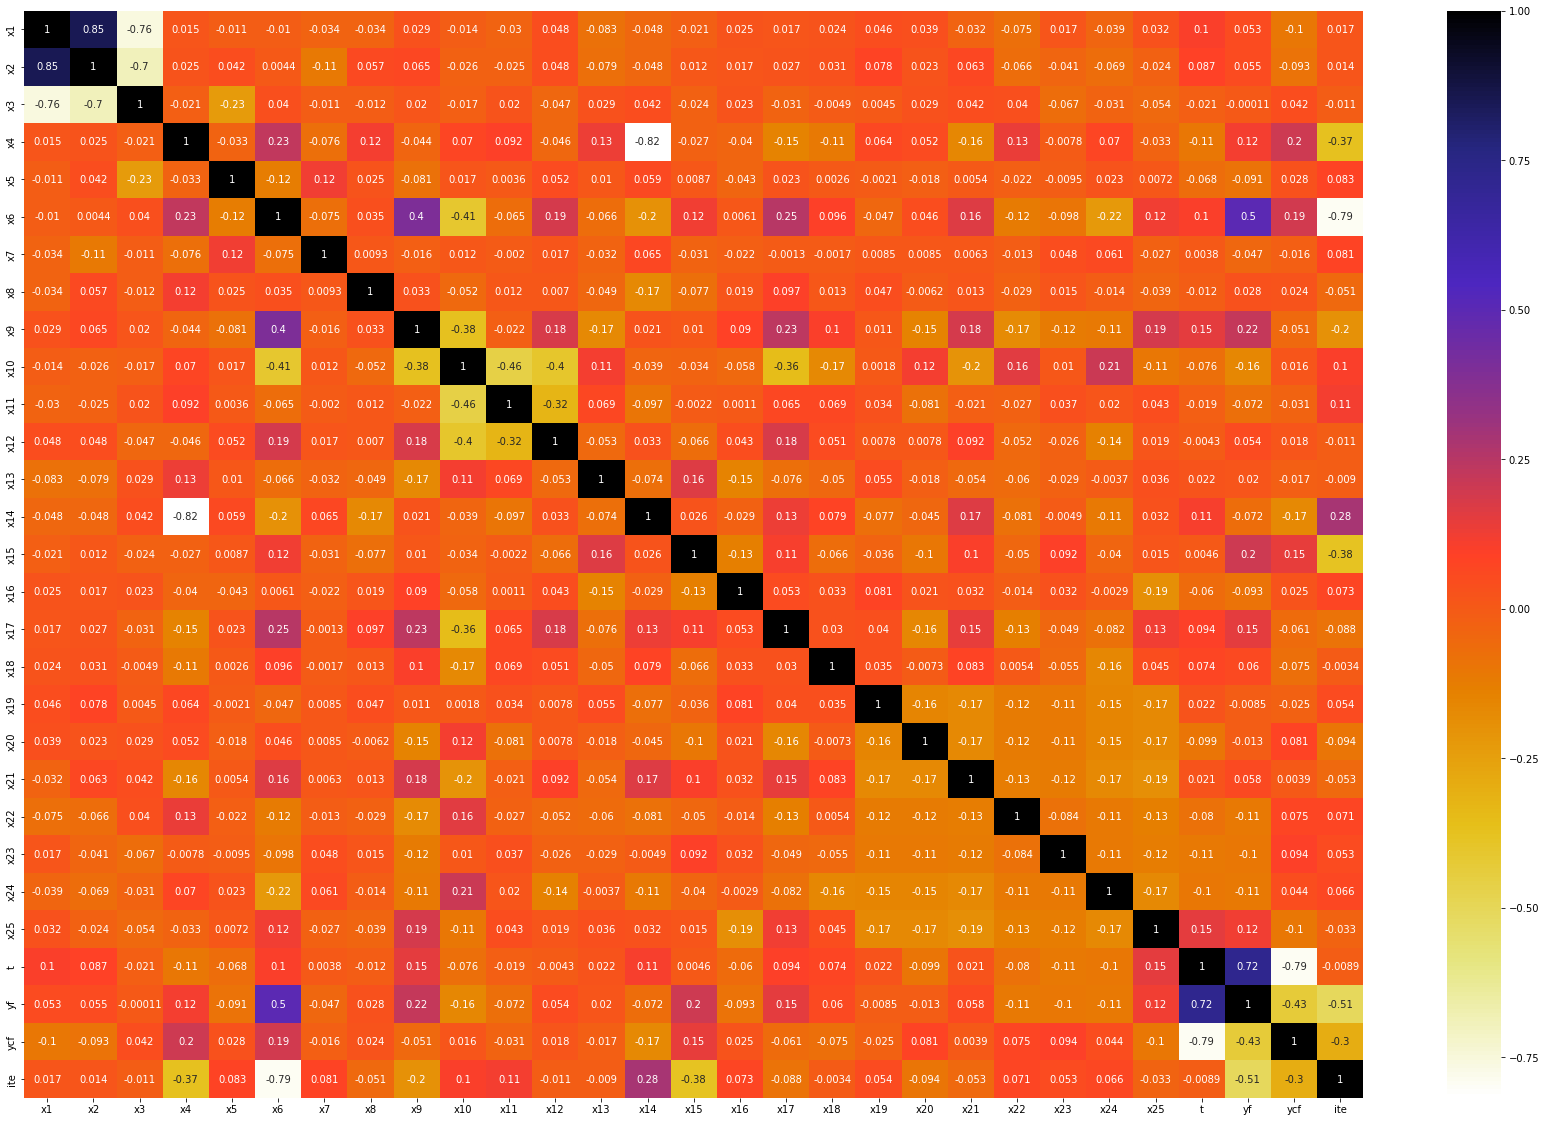

There are  1  highly correlated(>80%) features {'x2'}   in the dataset


In [11]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()
from functions import correlation
correlation(df,0.8)
print('There are ', len(set(correlation(df,0.8))),' highly correlated(>80%) features',correlation(df,0.8),'  in the dataset')

# Train Test Split

In [12]:
data = df.copy()
X = np.array(data.drop(['t','yf','ycf','ite'],axis=1))
Y = np.array(data['yf']).reshape(-1,1)
T = np.array(data['t']).reshape(-1,1)
ite = data['ite']

In [13]:
x_train, x_test, t_train, t_test, y_train, y_test, ite_train, ite_test = train_test_split(X, T, Y, ite, test_size=0.2)

# Data Preprocessing

In [14]:
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [15]:
# for T = observered
xt_train = np.concatenate([x_train, t_train], axis=1) 
# for T=0
xt0_test = np.concatenate([x_test, np.zeros_like(t_test)], axis=1)
#for  T=1
xt1_test = np.concatenate([x_test, np.ones_like(t_test)], axis=1)

# Feature Importance

In [16]:
class OneHotEncoderCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, cat_features):
        self.cat_features = cat_features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cat_features,drop_first=True)

In [17]:
# list of categorical variables
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
# list of numerical variables
num_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

colTransformer = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
    ],
    remainder='passthrough'  # i.e., leave the rest of the columns untouched -- otherwise, they're dropped
    )

[25  5  0  4 14  1  2  3  6 12 23 24 16 11  7 19 13  8 10  9 18 21 20 17
 15 22]
Feature ranking:
1. t (0.514794)
2. x6 (0.253439)
3. x1 (0.040783)
4. x5 (0.033129)
5. x15 (0.028686)
6. x2 (0.019100)
7. x3 (0.018458)
8. x4 (0.017968)
9. x7 (0.008643)
10. x13 (0.006131)
11. x24 (0.004818)
12. x25 (0.004803)
13. x17 (0.004595)
14. x12 (0.004367)
15. x8 (0.004205)
16. x20 (0.004114)
17. x14 (0.004072)
18. x9 (0.004049)
19. x11 (0.004021)
20. x10 (0.003837)
21. x19 (0.003552)
22. x22 (0.003132)
23. x21 (0.002783)
24. x18 (0.002518)
25. x16 (0.002422)
26. x23 (0.001582)


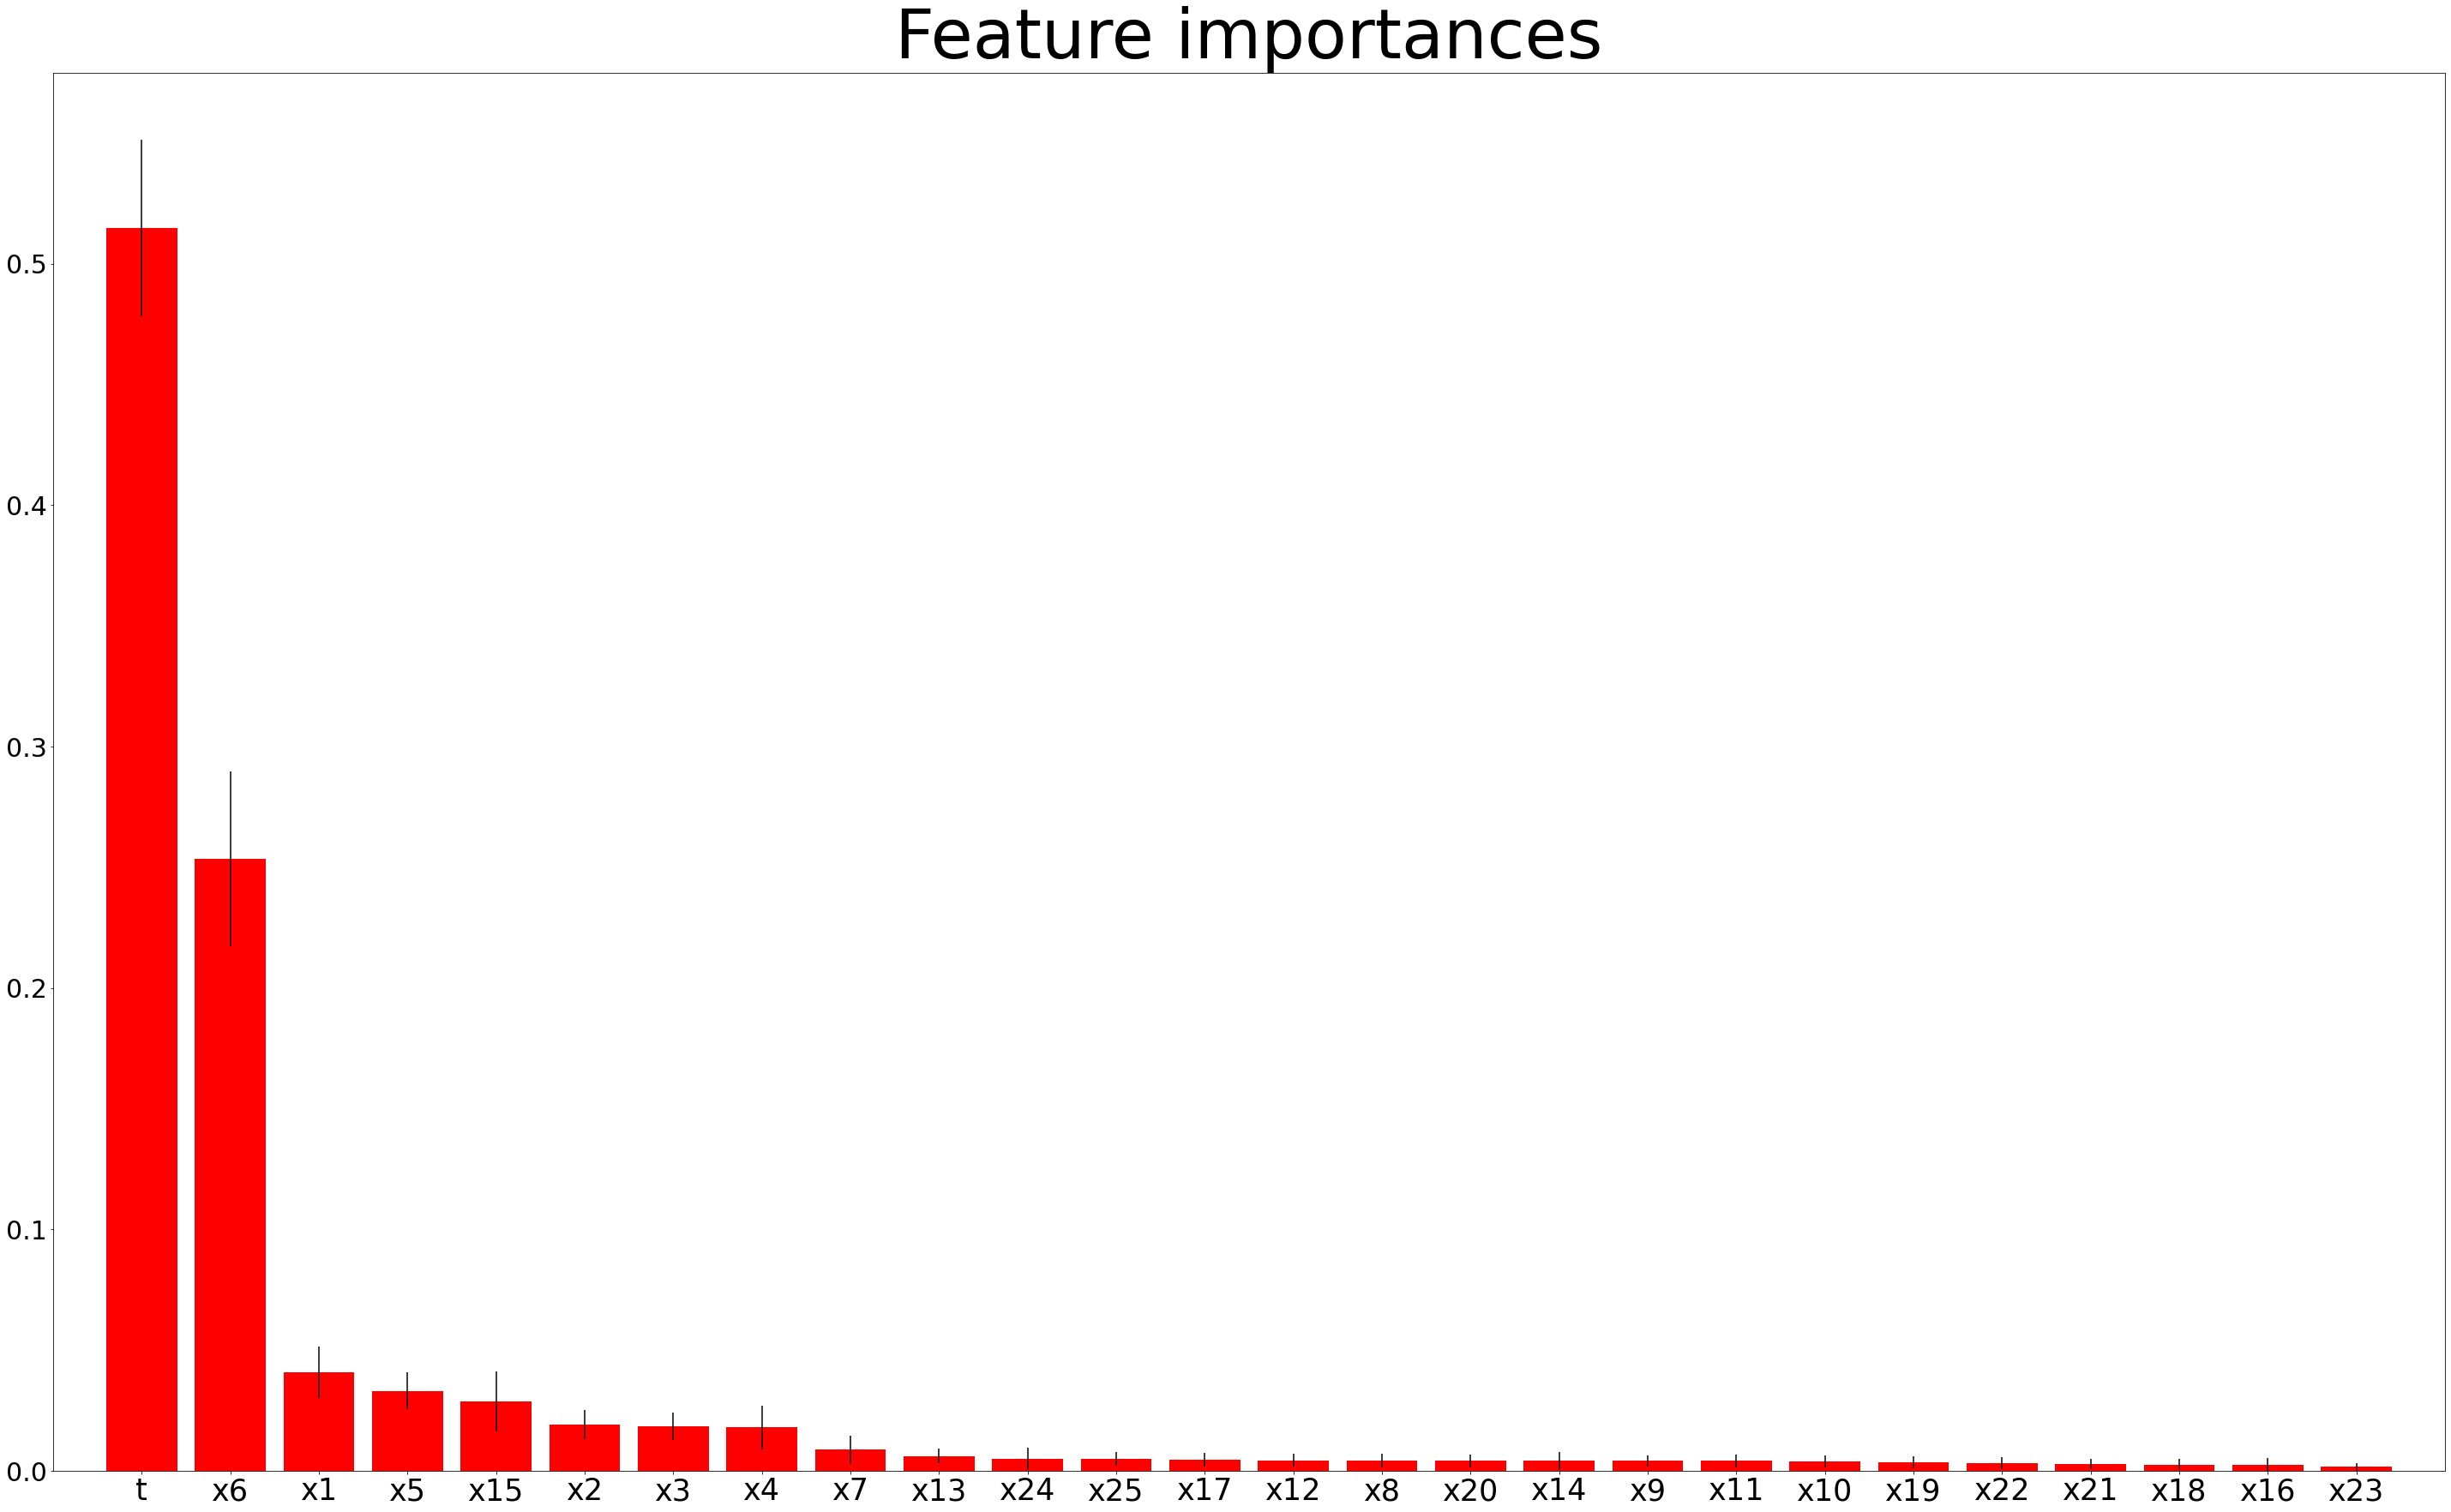

In [18]:
# Fit the model
clf = RandomForestRegressor()
clf.fit(xt_train, y_train.flatten())

# Let's see the feature importances for our classifier
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Let's get the attibute names:
feat_names = num_features

# Print the feature ranking
print("Feature ranking:")
for f in range(xt_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, feat_names[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances",fontsize = 80)
plt.bar(range(xt_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(xt_train.shape[1]), np.array(feat_names)[indices],fontsize=35)
plt.yticks(fontsize=30)
plt.xlim([-1, xt_train.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(50, 30)

# Modelling

## 1. Regression Model

In [19]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1200, num = 24)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


In [20]:
# Using the random grid to search for best hyperparameters
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, scoring=f1_score, n_iter = 10, cv = 10, verbose=2, random_state=50, n_jobs = 1)
rf_random.fit(xt_train, y_train.flatten())

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END .....................max_depth=2, n_estimators=1150; total time=   1.2s
[CV] END .....................max_depth=2, n_e

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950, 1000, 1050,
                                                         1100, 1150, 1200]},
                   random_state=50, scoring=<function f1_score at 0x131ea40d0>,
                   verbose=2)

In [21]:
 rf_random.best_estimator_

RandomForestRegressor(max_depth=5, n_estimators=600)

In [22]:
rf = rf_random.best_estimator_
rf.fit(xt_train, y_train.flatten())

# Predicting Y_0 given [X, 0]
# Used np.zeros functions to get the zeros for all units.
# Merged X and zeros .
xt0_test = np.concatenate([x_test, np.zeros_like(t_test)], axis=1)
rf_y0_test = rf.predict(xt0_test)

# Predict Y_1 given [X, 1]
# Used np.ones functions to get the ones for all units.
# Merged X and ones
xt1_test = np.concatenate([x_test, np.ones_like(t_test)], axis=1)
rf_y1_test = rf.predict(xt1_test)

# Compute predicted ITEs
# ITE = Y_1 - Y_0
rf_te_test = rf_y1_test - rf_y0_test

In [23]:
from functions import abs_ate,pehe
# Error on ATE
# Using  'abs_ate' function, true ITEs and predicted ITEs to get the measurements.
rf_ate_test = abs_ate(ite_test, rf_te_test)

# PEHE
# Using 'pehe' function, true ITEs and predicted ITEs to get the measurements.
rf_pehe_test =pehe(ite_test, rf_te_test)

results = []
results.append(['RF', rf_ate_test, rf_pehe_test])
cols = ['Method', 'ATE test', 'PEHE test']

df = pd.DataFrame(results, columns=cols)
df

,Method,ATE test,PEHE test
0,RF,0.06044,0.570633


# 2. Random Forest Classifier(IPW)

In [24]:
from functions import abs_ate,pehe,get_ps_weights
# Get the sample weights
prop_clf = RandomForestClassifier()
weights = get_ps_weights(prop_clf, x_train, t_train)

# Training the regressor
# Using the random grid to search for best hyperparameters
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations
rf_ipsw = RandomForestRegressor()
rf_ipsw_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, scoring=f1_score, n_iter = 10, cv = 10, verbose=2, random_state=50, n_jobs = 1)
rf_ipsw_random.fit(xt_train, y_train.flatten(), sample_weight= weights )
#Rf withsample. weights and best parameter
rf_ipsw = rf_ipsw_random.best_estimator_
rf_ipsw.fit(xt_train, y_train.flatten(), sample_weight= weights )

# Make predictions
rf_ipsw_y0_test = rf_ipsw.predict(xt0_test)
rf_ipsw_y1_test = rf_ipsw.predict(xt1_test)

# Compute ITEs
rf_ipsw_te_test = rf_ipsw_y1_test - rf_ipsw_y0_test

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.8s
[CV] END .....................max_depth=2, n_estimators=1150; total time=   1.1s
[CV] END .....................max_depth=2, n_e

# Evaluating RF after IPW

In [25]:
# Error on ATE
# Using  'abs_ate' function, true ITEs and predicted ITEs to get the measurements.
rf_ate_test = abs_ate(ite_test, rf_te_test)
rf_ipsw_ate_test = abs_ate(ite_test, rf_ipsw_te_test)

# PEHE
# Useing 'pehe' function, true ITEs and predicted ITEs to get the measurements.
rf_pehe_test =pehe(ite_test, rf_te_test)
rf_ipsw_pehe_test = pehe(ite_test, rf_ipsw_te_test)

results = []
results.append(['RF', rf_ate_test, rf_pehe_test])
results.append(['RF (IPW)', rf_ipsw_ate_test, rf_ipsw_pehe_test])

cols = ['Method', 'ATE test', 'PEHE test']

df = pd.DataFrame(results, columns=cols)
df

,Method,ATE test,PEHE test
0,RF,0.060440,0.570633
1,RF (IPW),0.062735,0.563696


# 3. CATE Estimator model

# X Learner 

In [26]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1200, num = 24)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_clf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions=random_grid, scoring=f1_score, n_iter = 10, cv = 10, verbose=2, random_state=50, n_jobs = 1)

rf_random.fit(y_train, t_train.flatten())



Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.6s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END .....................max_depth=2, n_estimators=1150; total time=   1.0s
[CV] END .....................max_depth=2, n_e

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950, 1000, 1050,
                                                         1100, 1150, 1200]},
                   random_state=50, scoring=<function f1_score at 0x131ea40d0>,
                   verbose=2)

In [27]:
# X-Learner
xl = XLearner(models=rf_random.best_estimator_, propensity_model=RandomForestClassifier())
xl.fit(y_train, t_train.flatten(), X=x_train)


xl_te_test = xl.effect(x_test)

s = []
for el in xl_te_test:
    s.append(float(el))
xl_te_test = np.array(s)



In [28]:
# Error on ATE
# Using  'abs_ate' function, true ITEs and predicted ITEs to get the measurements.
rf_ate_test = abs_ate(ite_test, rf_te_test)
rf_ipsw_ate_test = abs_ate(ite_test, rf_ipsw_te_test)
xl_ate_test = abs_ate(ite_test, xl_te_test)

# PEHE
# Useing 'pehe' function, true ITEs and predicted ITEs to get the measurements.
rf_pehe_test =pehe(ite_test, rf_te_test)
rf_ipsw_pehe_test = pehe(ite_test, rf_ipsw_te_test)
xl_pehe_test =  pehe(ite_test, xl_te_test)

results = []
results.append(['RF', rf_ate_test, rf_pehe_test])
results.append(['RF (IPW)', rf_ipsw_ate_test, rf_ipsw_pehe_test])
results.append(['XL', xl_ate_test, xl_pehe_test])

cols = ['Method', 'ATE test', 'PEHE test']

df = pd.DataFrame(results, columns=cols)
df

,Method,ATE test,PEHE test
0,RF,0.060440,0.570633
1,RF (IPW),0.062735,0.563696
2,XL,0.010812,0.557490


# T learner

In [29]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1200, num = 24)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_clf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions=random_grid, scoring=f1_score, n_iter = 10, cv = 10, verbose=2, random_state=50, n_jobs = 1)

In [31]:
rf_random.fit(y_train, t_train.flatten())

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.5s
[CV] END .....................max_depth=2, n_estimators=1150; total time=   0.9s
[CV] END .....................max_depth=2, n_e

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950, 1000, 1050,
                                                         1100, 1150, 1200]},
                   random_state=50, scoring=<function f1_score at 0x131ea40d0>,
                   verbose=2)

In [32]:
# Instantiate T learner
models =rf_random.best_estimator_
T_learner = TLearner(models=models)
# Train T_learner
T_learner.fit(y_train, t_train.flatten(), X=x_train)
# Estimate treatment effects on test data
tl_te_test= T_learner.effect(x_test)

tl_te_test = T_learner.effect(x_test)

s = []
for el in tl_te_test:
    s.append(float(el))
tl_te_test = np.array(s)

In [33]:
# Error on ATE
# Using  'abs_ate' function, true ITEs and predicted ITEs to get the measurements.
rf_ate_test = abs_ate(ite_test, rf_te_test)
rf_ipsw_ate_test = abs_ate(ite_test, rf_ipsw_te_test)
xl_ate_test = abs_ate(ite_test, xl_te_test)
tl_ate_test = abs_ate(ite_test, tl_te_test)

# PEHE
# Useing 'pehe' function, true ITEs and predicted ITEs to get the measurements.
rf_pehe_test =pehe(ite_test, rf_te_test)
rf_ipsw_pehe_test = pehe(ite_test, rf_ipsw_te_test)
xl_pehe_test =  pehe(ite_test, xl_te_test)
tl_pehe_test =  pehe(ite_test, tl_te_test)

results = []
results.append(['RF', rf_ate_test, rf_pehe_test])
results.append(['RF (IPW)', rf_ipsw_ate_test, rf_ipsw_pehe_test])
results.append(['XL', xl_ate_test, xl_pehe_test])
results.append(['TL', tl_ate_test, tl_pehe_test])

cols = ['Method', 'ATE test', 'PEHE test']

df = pd.DataFrame(results, columns=cols)
df


,Method,ATE test,PEHE test
0,RF,0.060440,0.570633
1,RF (IPW),0.062735,0.563696
2,XL,0.010812,0.557490
3,TL,0.063817,0.582932


# Scatter Plot of Treatment Effect

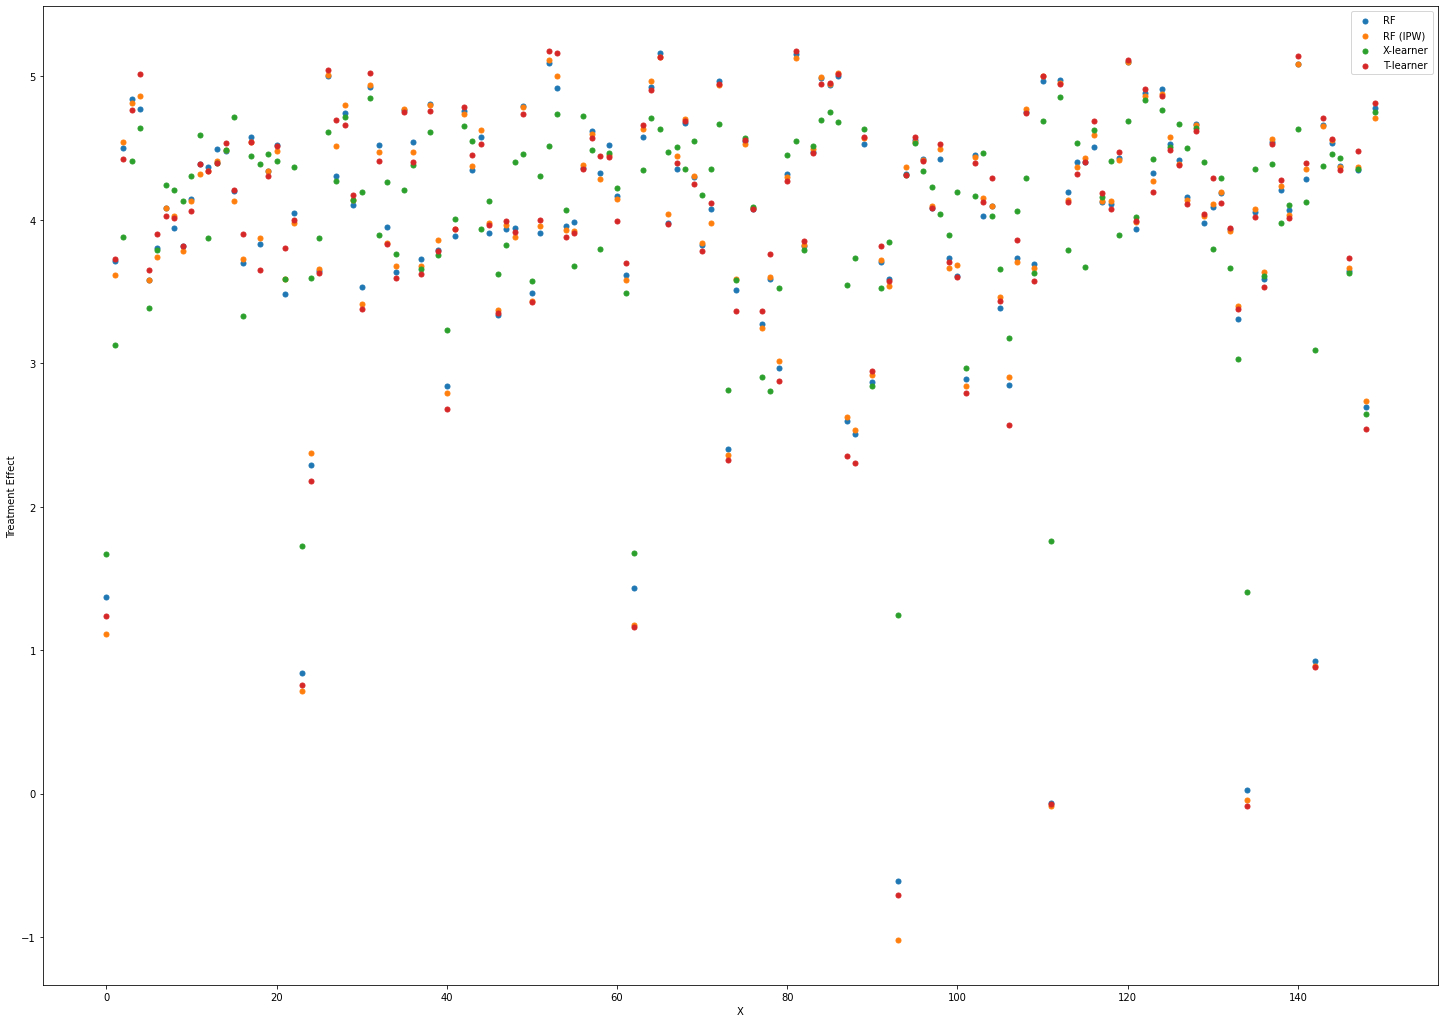

In [34]:
plt.figure(figsize=(25, 18))
m_size = 25
plt.scatter(range(x_test.shape[0]), rf_te_test, label="RF ", s=m_size)
plt.scatter(range(x_test.shape[0]), rf_ipsw_te_test, label="RF (IPW)", s=m_size)
plt.scatter(range(x_test.shape[0]), xl_te_test, label="X-learner", s=m_size)
plt.scatter(range(x_test.shape[0]), tl_te_test, label="T-learner", s=m_size)
plt.xlabel('X')
plt.ylabel('Treatment Effect')
plt.legend()
plt.show()